In [ ]:
import pandas as pd

In [ ]:
import io
from google.colab import files
upload=files.upload()
df=pd.read_csv(io.BytesIO(data_to_load['Churn_Modelling.csv']))

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


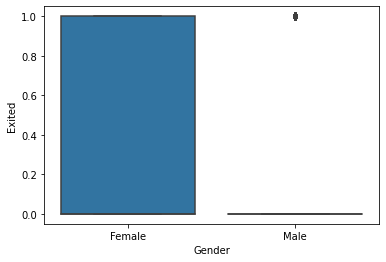

In [ ]:
#EDA
import seaborn as sns
sns.boxplot(x='Gender',y='Exited',data=df)

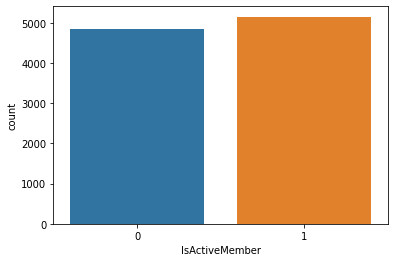

In [ ]:
import seaborn as sns
sns.countplot(x='IsActiveMember',data=df)

<BarContainer object of 10000 artists>

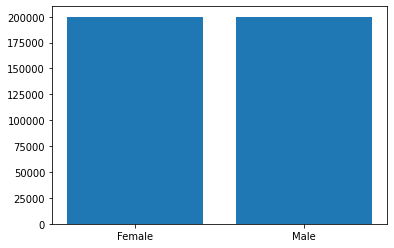

In [ ]:
#Comparing Salaries on the basis of Gender
import matplotlib.pyplot as plt

plt.bar(x='Gender',height='EstimatedSalary',data=df)

In [ ]:
x=df.drop(['CustomerId','Surname','Geography','Gender','Exited'],axis=1)
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [ ]:
#Scaling data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
#creating model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout 

In [ ]:
model=Sequential()
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=5,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x=x_train,y=y_train,epochs=350,validation_data=(x_test,y_test),verbose=1)

Epoch 1/350
250/250 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7890 - val_loss: 0.4777 - val_accuracy: 0.8080
Epoch 2/350
250/250 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7909 - val_loss: 0.4655 - val_accuracy: 0.8080
Epoch 3/350
250/250 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7915 - val_loss: 0.4567 - val_accuracy: 0.8080
Epoch 4/350
250/250 [==============================] - 0s 1ms/step - loss: 0.4691 - accuracy: 0.7993 - val_loss: 0.4492 - val_accuracy: 0.8080
Epoch 5/350
250/250 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7941 - val_loss: 0.4339 - val_accuracy: 0.8165
Epoch 6/350
250/250 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.8036 - val_loss: 0.4228 - val_accuracy: 0.8245
Epoch 7/350
250/250 [==============================] - 0s 1ms/step - loss: 0.4472 - accuracy: 0.8129 - val_loss: 0.4228 - val_accuracy: 0.8240

In [ ]:
model_loss=pd.DataFrame(model.history.history)

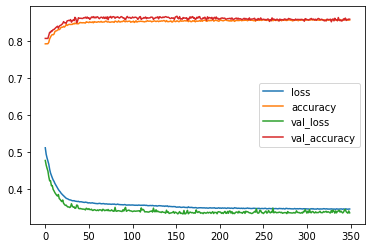

In [ ]:
model_loss.plot()

In [ ]:
# rmsprop
model2=Sequential()
model2.add(Dense(units=10,activation='relu'))
model2.add(Dense(units=5,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model2.fit(x=x_train,y=y_train,epochs=350,validation_data=(x_test,y_test),verbose=1)

Epoch 1/350
250/250 [==============================] - 1s 2ms/step - loss: 0.5837 - accuracy: 0.7908 - val_loss: 0.4893 - val_accuracy: 0.8080
Epoch 2/350
250/250 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.7875 - val_loss: 0.4832 - val_accuracy: 0.8080
Epoch 3/350
250/250 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.7918 - val_loss: 0.4770 - val_accuracy: 0.8080
Epoch 4/350
250/250 [==============================] - 0s 1ms/step - loss: 0.4982 - accuracy: 0.7923 - val_loss: 0.4697 - val_accuracy: 0.8080
Epoch 5/350
250/250 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7943 - val_loss: 0.4634 - val_accuracy: 0.8080
Epoch 6/350
250/250 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.7943 - val_loss: 0.4577 - val_accuracy: 0.8080
Epoch 7/350
250/250 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7870 - val_loss: 0.4507 - val_accuracy: 0.8080

In [ ]:
#Adding Dropout Layers

model3=Sequential()
model3.add(Dense(units=10,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(units=5,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(units=1,activation='sigmoid'))


model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model3.fit(x=x_train,y=y_train,epochs=300,validation_data=(x_test,y_test),verbose=1)

Epoch 1/300
250/250 [==============================] - 1s 2ms/step - loss: 0.5962 - accuracy: 0.7837 - val_loss: 0.4935 - val_accuracy: 0.8080
Epoch 2/300
250/250 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7922 - val_loss: 0.4862 - val_accuracy: 0.8080
Epoch 3/300
250/250 [==============================] - 0s 2ms/step - loss: 0.5182 - accuracy: 0.8020 - val_loss: 0.4802 - val_accuracy: 0.8080
Epoch 4/300
250/250 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7927 - val_loss: 0.4728 - val_accuracy: 0.8080
Epoch 5/300
250/250 [==============================] - 0s 2ms/step - loss: 0.5157 - accuracy: 0.7969 - val_loss: 0.4730 - val_accuracy: 0.8080
Epoch 6/300
250/250 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7926 - val_loss: 0.4684 - val_accuracy: 0.8080
Epoch 7/300
250/250 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7860 - val_loss: 0.4610 - val_accuracy: 0.8080

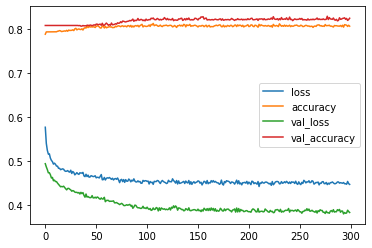

In [ ]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.plot()

In [ ]:
#From above analysis we can say that model2 is giving better results than other two models
pred=model2.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("For Second model")
print(classification_report(y_test,pred))

For Second model
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1616
           1       0.81      0.40      0.54       384

    accuracy                           0.87      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.86      0.87      0.85      2000

